# 1. EDA - Data Science Salaries 2024

Neste projeto será realizado o processo de EDA (Exploratory Data Analysis) a partir do dataset Data Science Salaries 2024, que pode ser encontrado no [Kaggle](https://www.kaggle.com/datasets/sazidthe1/data-science-salaries/data), com licensa [Database: Open Database](https://opendatacommons.org/licenses/dbcl/1-0/) e enviado por [Sazidul Islam](https://www.kaggle.com/sazidthe1).

## 1.1. Os dados, o problema e os objetivos
Como pessoa em transição de carreira é muito importante ter noção do novo ambiente corporativo que me aguarda, do que vou enfrentar no começo, e onde posso chegar encarando essa jornada. Outro passo importante é entender os próximos passos após chegar ao meu primeiro emprego na área de dados, onde vou virar meu foco de estudos, entrei nesta jornada após ouvir muito sobre Data Science e Machine Learninig mas ao iniciar meus estudos e correr atrás de entender esse universo vi que existem várias outras posições. Este conjunto de dados abrange uma grande coleção de dados sobre salários na área de Data Science, no período de tempo entre 2020 e 2024, os dados incluem vários aspectos relacionados a salário, proporcionando uma visão multifacetada da carreira. 

Os dados foram coletados do [ai-jobs.net](https://ai-jobs.net/).

### Estrutura do dataset

| Coluna | Descrição|
|--------|----------|
| **job_title** | O título da vaga ou posição associada ao salário registrado. |
| **experience_level** | Nível de experiência da pessoa que ocupa a vaga. |
| **employment_type** | Indica o regime de trabalho, se a vaga é integral, meio-período, etc. |
| **work_models** | Indica se o modelo de trabalho é presencial, híbrido ou remoto.|
| **work_year** | Específica o ano de trabalho. |
| **employee_residence** | O local onde o trabalhador reside. |
| **salary** | O salário registrado para vaga. |
| **salary_currency** | A moeda em que o salário foi registrado. |
| **salary_in_usd** | Salário em doláres. |
| **company_location** | Localização da empresa contratante. |
| **company_size** | Tamanho da empresa contratante. |

### Objetivos
Então meus objetivos com essa Análise Exploratória de Dado são:

- Buscar conhecer mais posições dentro da área, e como são remuneradas;
- Entender se empresas maiores valorizam mais os profissionais de dados;
- Compreender se os layoffs estão afetando a evolução dos salários ao longo do tempo;
- Onde estão localizadas as companhias que mais contratam;


## 1.2. Importação das bibliotecas e carregamento dos dados

In [58]:
# Bibliotecas para tratar dados
import pandas as pd
import numpy as np
import datetime
import os

# Bibliotecas para EDA
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py

# Configuração para não exibir warnings
import warnings

warnings.filterwarnings('ignore')

# Configuração o estilo dos gráficos para ggplot
plt.style.use('ggplot')

# Configuração para exibir até 15 linhas de um DataFrame do Pandas
pd.set_option('display.max_rows', 15)

# Configuração para exibir todas as colunas de um DataFrame do Pandas
pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv('data/raw/dados.csv')

# 2. Entendendo os dados

## 2.1. A estrutura do dataframe

In [6]:
print(f"O DataFrame possui {df.shape[0]} linhas e {df.shape[1]} colunas.")

O DataFrame possui 6599 linhas e 11 colunas.


In [7]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numericas = df.select_dtypes(include = numerics)
nao_numericas = df.select_dtypes(exclude = numerics)

print(
    f'Temos {numericas.shape[1]} colunas numéricas e {nao_numericas.shape[1]} colunas não-numéricas'
)

Temos 3 colunas numéricas e 8 colunas não-numéricas


In [8]:
df.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


In [9]:
df.tail()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
6594,Staff Data Analyst,Entry-level,Contract,Hybrid,2020,Canada,60000,CAD,44753,Canada,Large
6595,Staff Data Analyst,Executive-level,Full-time,On-site,2020,Nigeria,15000,USD,15000,Canada,Medium
6596,Machine Learning Manager,Senior-level,Full-time,Hybrid,2020,Canada,157000,CAD,117104,Canada,Large
6597,Data Engineer,Mid-level,Full-time,Hybrid,2020,Austria,65000,EUR,74130,Austria,Large
6598,Data Scientist,Senior-level,Full-time,On-site,2020,Austria,80000,EUR,91237,Austria,Small


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           6599 non-null   object
 1   experience_level    6599 non-null   object
 2   employment_type     6599 non-null   object
 3   work_models         6599 non-null   object
 4   work_year           6599 non-null   int64 
 5   employee_residence  6599 non-null   object
 6   salary              6599 non-null   int64 
 7   salary_currency     6599 non-null   object
 8   salary_in_usd       6599 non-null   int64 
 9   company_location    6599 non-null   object
 10  company_size        6599 non-null   object
dtypes: int64(3), object(8)
memory usage: 567.2+ KB


In [11]:
for col in df.columns:
    print(f'Coluna: {col}')
    print(df[col].unique())
    print('-' * 65)

Coluna: job_title
['Data Engineer' 'Data Scientist' 'BI Developer' 'Research Analyst'
 'Business Intelligence Developer' 'Data Analyst'
 'Director of Data Science' 'MLOps Engineer' 'Machine Learning Scientist'
 'Machine Learning Engineer' 'Data Science Manager' 'Applied Scientist'
 'Business Intelligence Analyst' 'Analytics Engineer'
 'Business Intelligence Engineer' 'Data Science' 'Research Scientist'
 'Research Engineer' 'Managing Director Data Science' 'AI Engineer'
 'Data Specialist' 'Data Architect' 'Data Visualization Specialist'
 'ETL Developer' 'Data Science Practitioner' 'Computer Vision Engineer'
 'Data Lead' 'ML Engineer' 'Data Developer' 'Data Modeler'
 'Data Science Consultant' 'AI Architect' 'Data Analytics Manager'
 'Data Science Engineer' 'Data Product Manager' 'Data Quality Analyst'
 'Data Strategist' 'Prompt Engineer' 'Data Science Lead'
 'Business Intelligence Manager' 'Data Manager' 'Data Analytics Lead'
 'Machine Learning Infrastructure Engineer' 'Data Integration 

## 2.2. Breves conclusões antes de partir para os próximos passos

- O dataframe parece limpo e bem cuidado, possivelmente não terá nulos e duplicatas;
- Existem muitas posições dentro da área de Data Science, muitas funções de engenharia e outras um pouco vagas enquanto ao propósito;
- Vejo a necessidade de criar uma coluna de especialidade ou expertise, para ter melhor entendimento na análise;
- Alguns preenchimentos de employee_residence contém estados dos EUA, será necessário mudar para a localidade do país;

# 3. Limpeza e manipulação dos dados

## 3.1. Verificação de nulos e duplicatas

In [12]:
print(f'O conjunto de dados tem {df.isna().sum().sum()} dados nulos.')

O conjunto de dados tem 0 dados nulos.


In [13]:
print(f'O conjunto de dados tem {df.duplicated().sum()} dados duplicados.')

O conjunto de dados tem 0 dados duplicados.


## 3.2. Manipulação dos dados e colunas

In [14]:
df['employee_residence'].unique()

array(['United States', 'Romania', 'Portugal', 'Lebanon', 'India',
       'Ireland', 'United Kingdom', 'Spain', 'Egypt', 'Germany', 'Canada',
       'Australia', 'Vietnam', 'Uganda', 'Italy', 'Thailand',
       'Philippines', 'Tunisia', 'Belgium', 'Turkey', 'Nigeria',
       'Uzbekistan', 'Argentina', 'France', 'Kuwait', 'Ukraine',
       'South Africa', 'Slovenia', 'Singapore', 'Sweden', 'Saudi Arabia',
       'Armenia', 'Russia', 'Georgia', 'Qatar', 'Peru', 'Poland',
       'New Zealand', 'Norway', 'Netherlands', 'Mexico', 'Latvia',
       'Pakistan', 'Lithuania', 'South Korea', 'Kenya', 'Moldova',
       'Israel', 'Hungary', 'Croatia', 'Hong Kong', 'Greece', 'Ghana',
       'Finland', 'Estonia', 'Cyprus', 'Ecuador', 'Austria', 'Colombia',
       'Switzerland', 'Central African Republic', 'Czech Republic',
       'Brazil', 'Bosnia and Herzegovina', 'Andorra', 'China',
       'Costa Rica', 'Chile', 'Bolivia', 'Malaysia',
       'United Arab Emirates', 'Puerto Rico', 'Japan', 'Iran',
 

Georgia pode ser tanto o país, quanto o estado americano. Então vamos olhar mais de perto.

In [15]:
df.loc[df['employee_residence'] == 'Georgia']

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
4475,Product Data Analyst,Senior-level,Full-time,Remote,2023,Georgia,57000,USD,57000,Russia,Large


A companhia estar localizada na Rússia me faz acreditar que esta vaga é de uma pessoa que reside na Geórgia país pela localização geográfica dele em relação à Rússia, agora vamos ver os registros em Jersey.

In [16]:
df.loc[df['employee_residence'] == 'Jersey']

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
6503,Research Scientist,Entry-level,Full-time,On-site,2021,Jersey,100000,USD,100000,China,Large


In [17]:
df['employee_residence'] = df['employee_residence'].replace('Jersey', 'United States')

**Agora vamos partir para criação de uma coluna de especialidade.** 

In [18]:
df['job_title'].unique()

array(['Data Engineer', 'Data Scientist', 'BI Developer',
       'Research Analyst', 'Business Intelligence Developer',
       'Data Analyst', 'Director of Data Science', 'MLOps Engineer',
       'Machine Learning Scientist', 'Machine Learning Engineer',
       'Data Science Manager', 'Applied Scientist',
       'Business Intelligence Analyst', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Data Science',
       'Research Scientist', 'Research Engineer',
       'Managing Director Data Science', 'AI Engineer', 'Data Specialist',
       'Data Architect', 'Data Visualization Specialist', 'ETL Developer',
       'Data Science Practitioner', 'Computer Vision Engineer',
       'Data Lead', 'ML Engineer', 'Data Developer', 'Data Modeler',
       'Data Science Consultant', 'AI Architect',
       'Data Analytics Manager', 'Data Science Engineer',
       'Data Product Manager', 'Data Quality Analyst', 'Data Strategist',
       'Prompt Engineer', 'Data Science Lead',
       'Busi

### Observações

De maneira mais generalista quero dividir a nova coluna 'expertise' em 3:

- Data Analysis;
- Business Intelligence;
- Data science.

In [19]:
def classificador(vaga):
    if 'Data Analyst' in vaga or 'Analytics' in vaga or 'Analyst' in vaga:
        return 'Data Analysis'
    elif 'Business Intelligence' in vaga:
        return 'Business Intelligence'
    else:
        return 'Data Science'

In [20]:
df['expertise'] = df['job_title'].apply(classificador)
df.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size,expertise
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium,Data Science
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium,Data Science
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium,Data Science
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium,Data Science
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium,Data Science


In [86]:
# Vou salvar o dataframe modificado

df.to_csv('data/ready/dados_modificados.csv', index = False)

# 4. EDA ou Análise Exploratória de Dados

### Quais as top 10 posições com mais profissionais contratados?

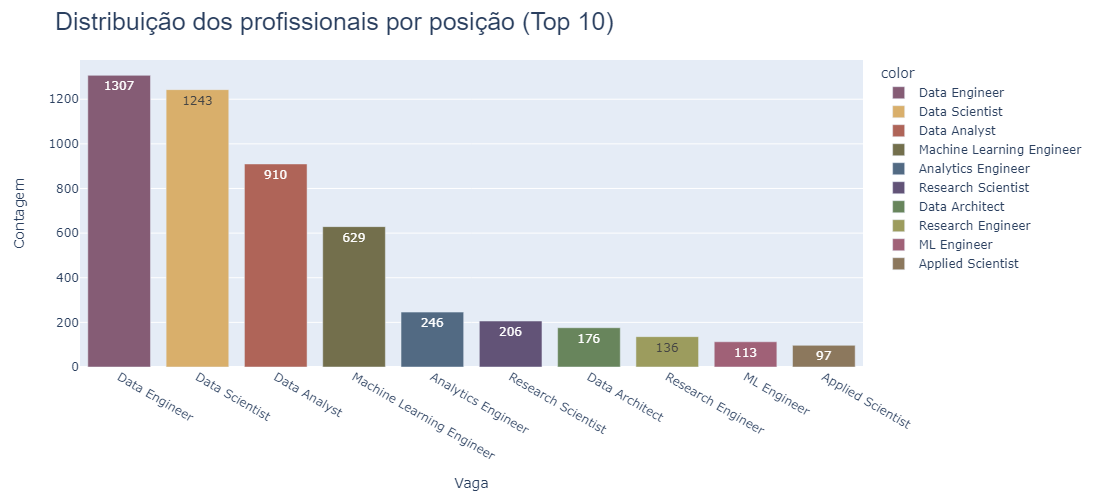

In [21]:
fig = px.bar(df, 
             x = df['job_title'].value_counts().index[:10], 
             y = df['job_title'].value_counts().values[:10], 
             color = df['job_title'].value_counts().index[:10], 
             color_discrete_sequence = px.colors.qualitative.Antique,
             text_auto = True)
fig.update_layout(title = 'Distribuição dos profissionais por posição (Top 10)', 
                  title_font = {'family': 'Helvetica', 'size': 25},
                  xaxis_title = 'Vaga',
                  yaxis_title = 'Contagem', 
                  width = 1100, 
                  height = 500)

fig.show(renderer = 'png')

Ultimamente tenho tido mais contato com a área de engenharia de dados, e é interessante ver que nela existem muitas vagas. Ver o alto número de contratados como analista de dados também é animador.

### Quais especialidades tem mais profissionais contratados?

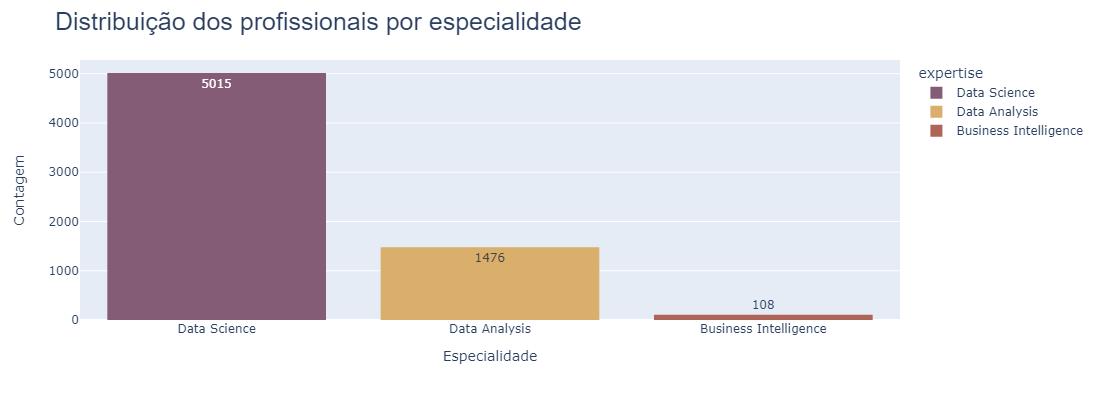

In [22]:
fig = px.histogram(df, 
                   x = 'expertise', 
                   color = 'expertise', 
                   color_discrete_sequence = px.colors.qualitative.Antique,
                   text_auto=True)

fig.update_layout(title = 'Distribuição dos profissionais por especialidade', 
                  title_font = {'family': 'Helvetica', 'size': 25},
                  xaxis_title = 'Especialidade',
                  yaxis_title = 'Contagem', 
                  width = 1100, 
                  height = 400)

fig.update_xaxes(categoryorder='total descending')

fig.show(renderer = 'png')

Ao fazer minha classficação pensei em dividir nessas três categorias com o critério de Data Science pegar vagas que exigiriam maiores hard skills, englobando AI, Machine Learning e posições de Engenharia e Arquitetura de dados. Análise de Dados e BI são áreas que muitas vezes se misturam ou se sobrepõem mas acho interessante separar as duas nesta análise.

### Qual a distribuição de vagas por nível de experiência?

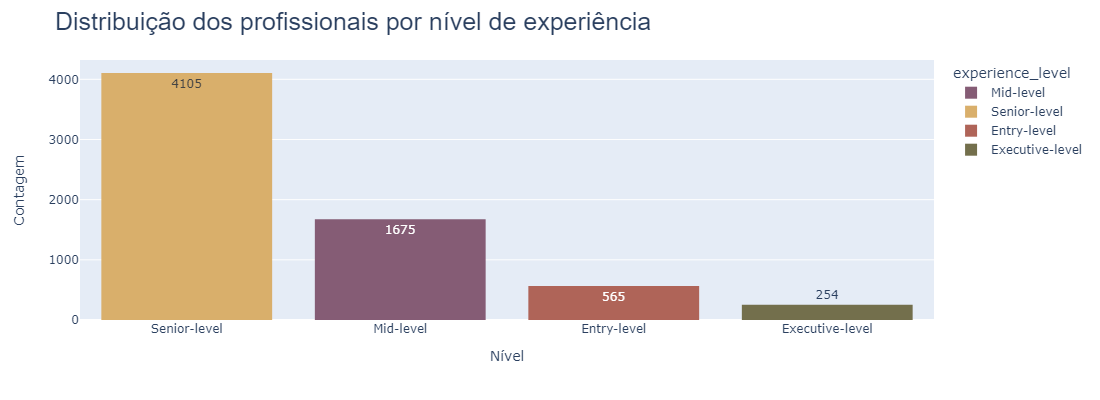

In [23]:
fig = px.histogram(df, 
                   x = 'experience_level', 
                   color = 'experience_level', 
                   color_discrete_sequence = px.colors.qualitative.Antique,
                   text_auto=True)

fig.update_layout(title = 'Distribuição dos profissionais por nível de experiência', 
                  title_font = {'family': 'Helvetica', 'size': 25},
                  xaxis_title = 'Nível',
                  yaxis_title = 'Contagem', 
                  width = 1100, 
                  height = 400)

fig.update_xaxes(categoryorder='total descending')

fig.show(renderer = 'png')

O nível de experiência com mais vagas ocupadas é o Senior, seguido pelo nível Pleno. Esse desbalanceamento no número de vagas (quase o dobro de seniores em relação a plenos, e o triplo de plenos em relação aos entry-level ou junior) acredito que com o passar do tempo irá forçar o aumento das vagas Júnior.

### Qual a distribuição dos modelos de trabalho?

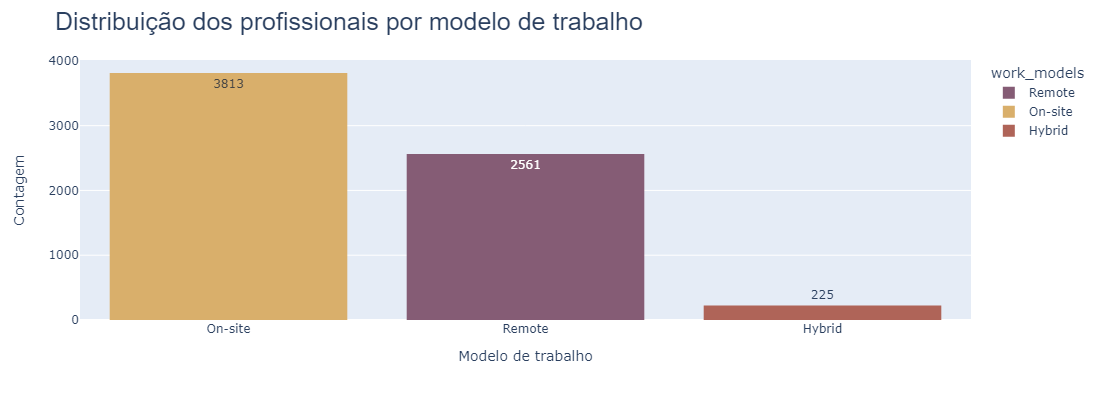

In [24]:
fig = px.histogram(df, 
                   x = 'work_models', 
                   color = 'work_models', 
                   color_discrete_sequence = px.colors.qualitative.Antique,
                   text_auto=True)

fig.update_layout(title = 'Distribuição dos profissionais por modelo de trabalho', 
                  title_font = {'family': 'Helvetica', 'size': 25},
                  xaxis_title = 'Modelo de trabalho',
                  yaxis_title = 'Contagem', 
                  width = 1100, 
                  height = 400)

fig.update_xaxes(categoryorder='total descending')

fig.show(renderer = 'png')

Pós pandemia de COVID-19 as vagas de trabalho presenciais já são maioria, como imaginava. Mas as vagas remotas ainda são uma parcela bastante relevante, apesar de eu ter em mente que vagas híbridas teriam mais vagas preenchidas. 

### Quais países tem mais profissionais de dados contratados (Top 10)?

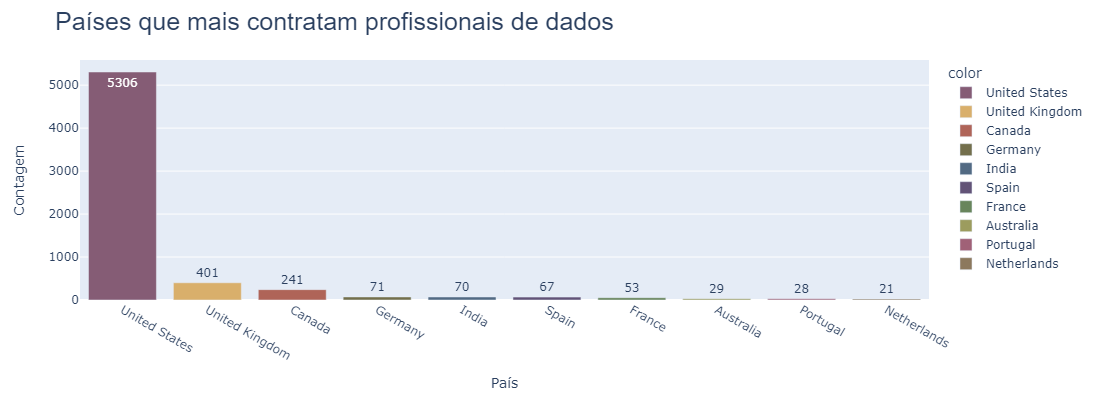

In [25]:
fig = px.bar(df, 
             x = df['employee_residence'].value_counts().index[:10], 
             y = df['employee_residence'].value_counts().values[:10], 
             color = df['employee_residence'].value_counts().index[:10], 
             color_discrete_sequence = px.colors.qualitative.Antique,
             text_auto = True)
fig.update_layout(title = 'Países que mais contratam profissionais de dados', 
                  title_font = {'family': 'Helvetica', 'size': 25},
                  xaxis_title = 'País',
                  yaxis_title = 'Contagem', 
                  width = 1100, 
                  height = 400)

fig.show(renderer = 'png')

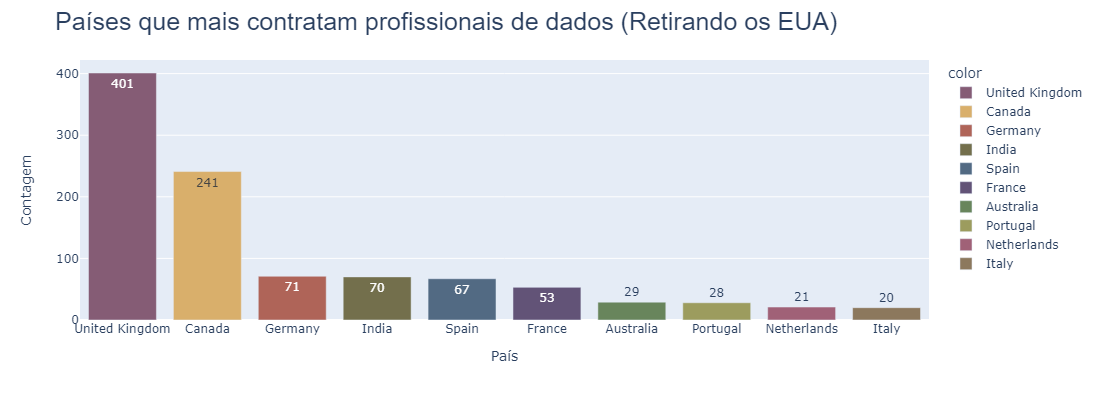

In [26]:
no_usa = df.loc[df['employee_residence'] != 'United States']

fig = px.bar(df, 
             x = no_usa['employee_residence'].value_counts().index[:10], 
             y = no_usa['employee_residence'].value_counts().values[:10], 
             color = no_usa['employee_residence'].value_counts().index[:10], 
             color_discrete_sequence = px.colors.qualitative.Antique,
             text_auto = True)
fig.update_layout(title = 'Países que mais contratam profissionais de dados (Retirando os EUA)', 
                  title_font = {'family': 'Helvetica', 'size': 25},
                  xaxis_title = 'País',
                  yaxis_title = 'Contagem', 
                  width = 1100, 
                  height = 400)

fig.show(renderer = 'png')

### Onde estão localizadas as companhias? 

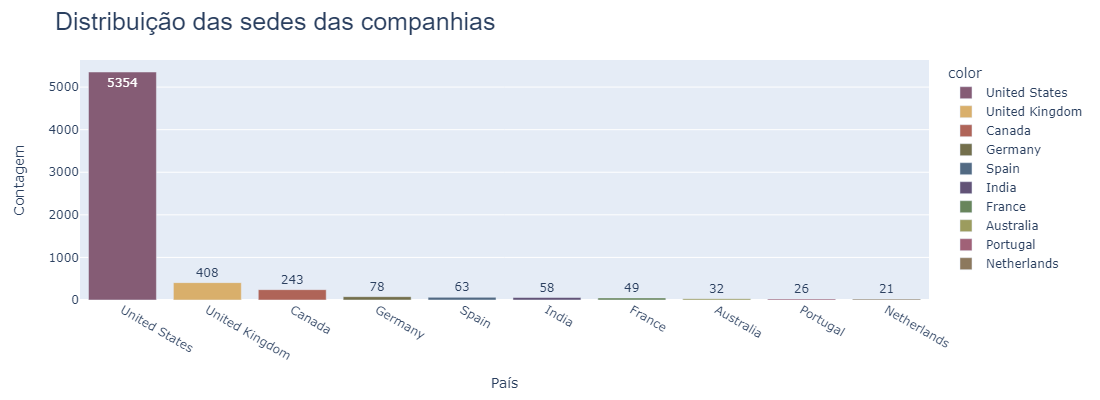

In [27]:
fig = px.bar(df, 
             x = df['company_location'].value_counts().index[:10], 
             y = df['company_location'].value_counts().values[:10], 
             color = df['company_location'].value_counts().index[:10], 
             color_discrete_sequence = px.colors.qualitative.Antique,
             text_auto = True)
fig.update_layout(title = 'Distribuição das sedes das companhias', 
                  title_font = {'family': 'Helvetica', 'size': 25},
                  xaxis_title = 'País',
                  yaxis_title = 'Contagem', 
                  width = 1100, 
                  height = 400)

fig.show(renderer = 'png')

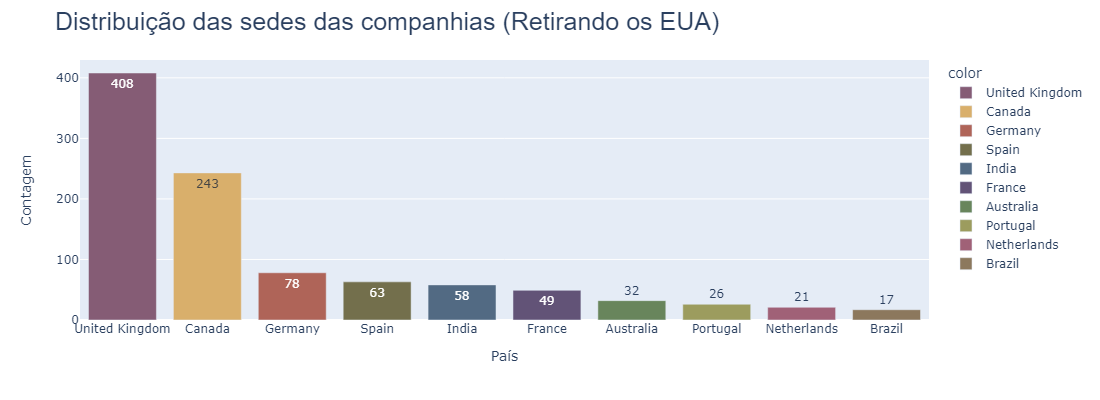

In [28]:
no_usa = df.loc[df['company_location'] != 'United States']

fig = px.bar(df, 
             x = no_usa['company_location'].value_counts().index[:10], 
             y = no_usa['company_location'].value_counts().values[:10], 
             color = no_usa['company_location'].value_counts().index[:10],
             color_discrete_sequence = px.colors.qualitative.Antique,
             text_auto = True)
fig.update_layout(title = 'Distribuição das sedes das companhias (Retirando os EUA)', 
                  title_font = {'family': 'Helvetica', 'size': 25},
                  xaxis_title = 'País',
                  yaxis_title = 'Contagem', 
                  width = 1100, 
                  height = 400)

fig.show(renderer = 'png')

Os EUA são o país onde estão localizadas algumas das maiores empresas de tecnologia do mundo, em 2023 mais de [70 delas estavam localizadas em solo norte-americano](https://forbes.com.br/forbes-tech/2023/06/quais-sao-as-maiores-empresas-de-tecnologia-do-mundo-em-2023/), então é natural que estive no topo do ranking. O Canadá é outro país onde são sedidas diversas companhias de tecnologia e é conhecido por um alto fluxo de migratorio por empregos neste setor, o restante das empresas está sediada em grande parte na Europa.

### Companhias grandes são as que mais contratam profissionais de dados?

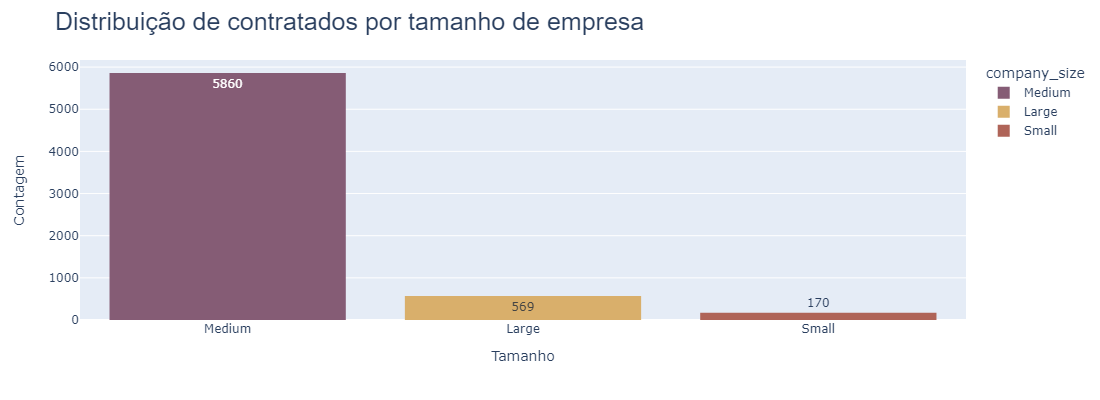

In [29]:
fig = px.histogram(df, 
                   x = 'company_size', 
                   color = 'company_size', 
                   color_discrete_sequence = px.colors.qualitative.Antique,
                   text_auto=True)

fig.update_layout(title = 'Distribuição de contratados por tamanho de empresa', 
                  title_font = {'family': 'Helvetica', 'size': 25},
                  xaxis_title = 'Tamanho',
                  yaxis_title = 'Contagem', 
                  width = 1100, 
                  height = 400)

fig.update_xaxes(categoryorder='total descending')

fig.show(renderer = 'png')

### Como estão distribuidos os salários no período analisado?

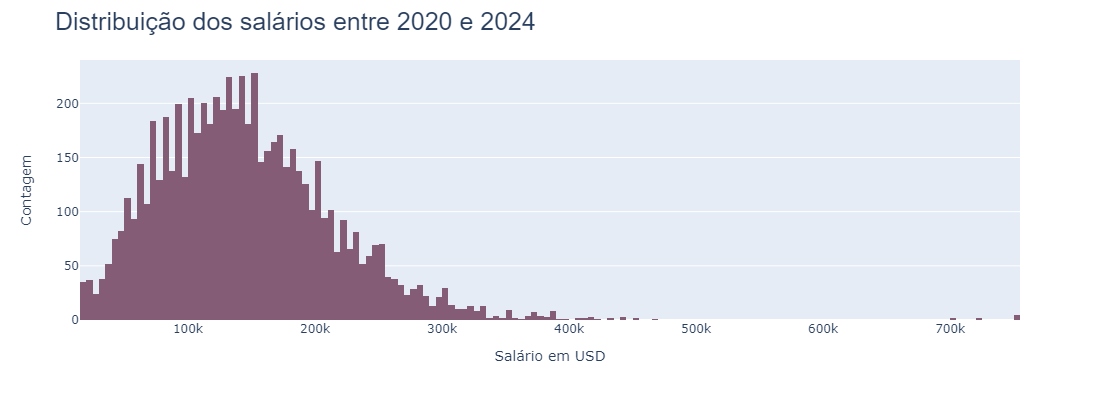

In [30]:
fig = px.histogram(df, 
                   x = 'salary_in_usd', 
                   color_discrete_sequence = px.colors.qualitative.Antique)

fig.update_layout(title = 'Distribuição dos salários entre 2020 e 2024', 
                  title_font = {'family': 'Helvetica', 'size': 25},
                  xaxis_title = 'Salário em USD',
                  yaxis_title = 'Contagem', 
                  width = 1100, 
                  height = 400)

fig.show(renderer = 'png')

Existe um desbalanceamento dos dados, o que indica existem de dados extremos ou outliers. Vamos utilizar também um boxplot para visualizar de maneira mais clara estes valores.

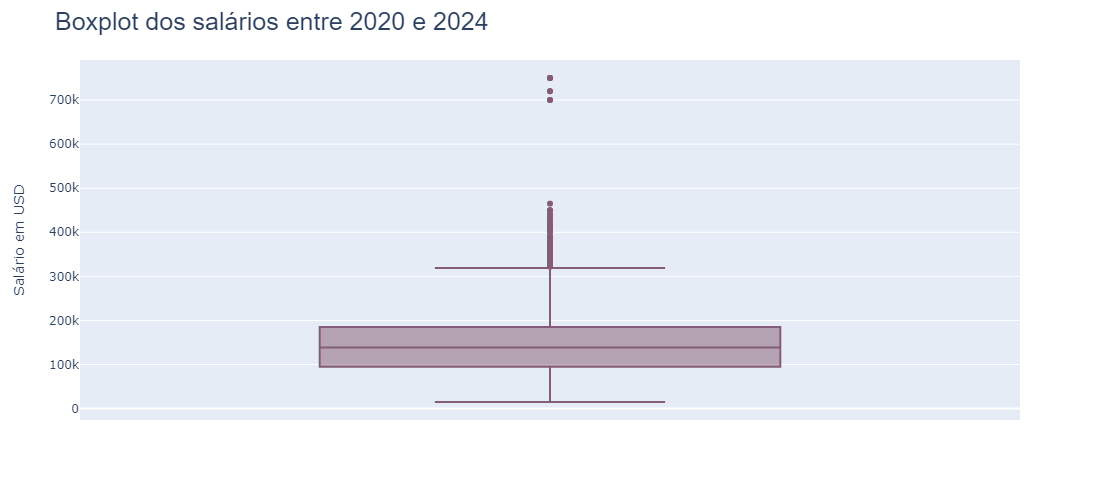

In [31]:
fig = px.box(df, y = 'salary_in_usd', color_discrete_sequence = px.colors.qualitative.Antique)

fig.update_layout(title = 'Boxplot dos salários entre 2020 e 2024', 
                  title_font = {'family': 'Helvetica', 'size': 25},
                  yaxis_title = 'Salário em USD', 
                  width = 1100, 
                  height = 500)

fig.show(renderer = 'png')

### Como os salários em dados vem evoluindo neste período?

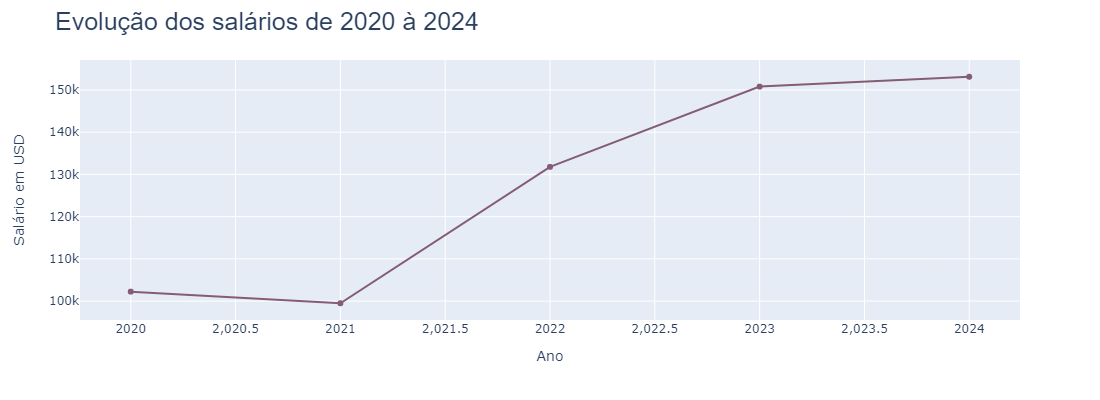

In [32]:
media_sal = df.groupby('work_year')['salary_in_usd'].mean().reset_index()
media_sal.columns = ['Work Year', 'Salary in USD']


fig = px.line(media_sal, 
              x = 'Work Year', 
              y = 'Salary in USD', 
              color_discrete_sequence = px.colors.qualitative.Antique, 
              markers = True)
fig.update_layout(title = 'Evolução dos salários de 2020 à 2024', 
                  title_font = {'family': 'Helvetica', 'size': 25},
                  xaxis_title = 'Ano',
                  yaxis_title = 'Salário em USD', 
                  width = 1100, 
                  height = 400)

fig.show(renderer = 'png')

Houve uma grande explosão de salários entre o fim de 2021 e o começo de 2022, e esse crescimento continua estável até o ano presente. Essa é uma notícia animadora para o futuro, o único momento de queda (e mesmo assim leve) nos salários foi no período de pandemia. 

### Como estão evoluindo os salários por especialidade?

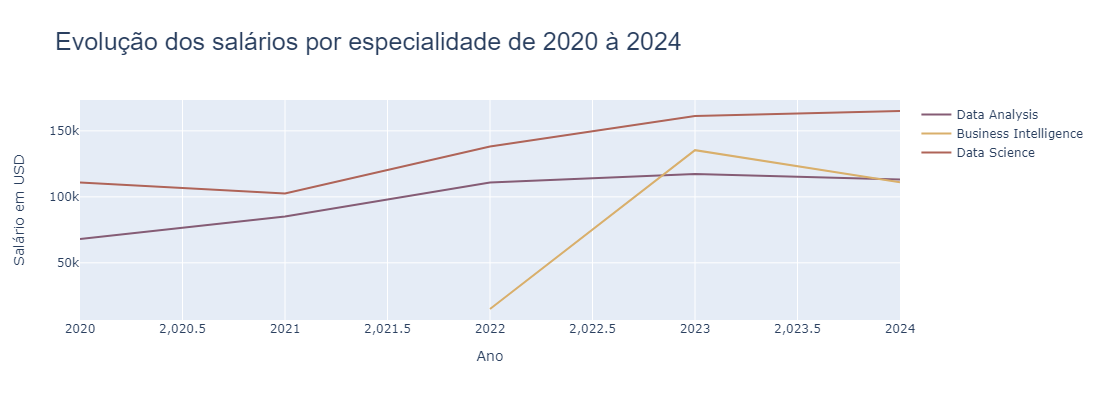

In [82]:
ex = df.groupby(['expertise', 'work_year'])['salary_in_usd'].mean().reset_index()

da = ex.loc[ex['expertise'] == 'Data Analysis'].reset_index()
bi = ex.loc[ex['expertise'] == 'Business Intelligence'].reset_index()
ds = ex.loc[ex['expertise'] == 'Data Science'].reset_index()

data_a = go.Scatter( 
                    x = da['work_year'], 
                    y = da['salary_in_usd'],
                    mode = 'lines',
                    line = {'color': '#855c75'},
                    name = 'Data Analysis')
                
business_i = go.Scatter( 
                    x = bi['work_year'], 
                    y = bi['salary_in_usd'],
                    mode = 'lines',
                    line = {'color': '#d9af6b'},
                    name = 'Business Intelligence')    

data_s = go.Scatter( 
                    x = ds['work_year'], 
                    y = ds['salary_in_usd'],
                    mode = 'lines',
                    line = {'color': '#af6458'},
                    name = 'Data Science') 

layout = go.Layout(title = 'Evolução dos salários por especialidade de 2020 à 2024',
                   xaxis = {'title': 'Ano'},
                   yaxis = {'title': 'Salário em USD'},
                   title_font = {'family': 'Helvetica', 'size': 25},
                   width = 1100, 
                   height = 400)

fig = go.Figure(data = [data_a, business_i, data_s],
                layout = layout)

fig.show(renderer = 'png')

### O número de vagas remotas vem diminuindo? 

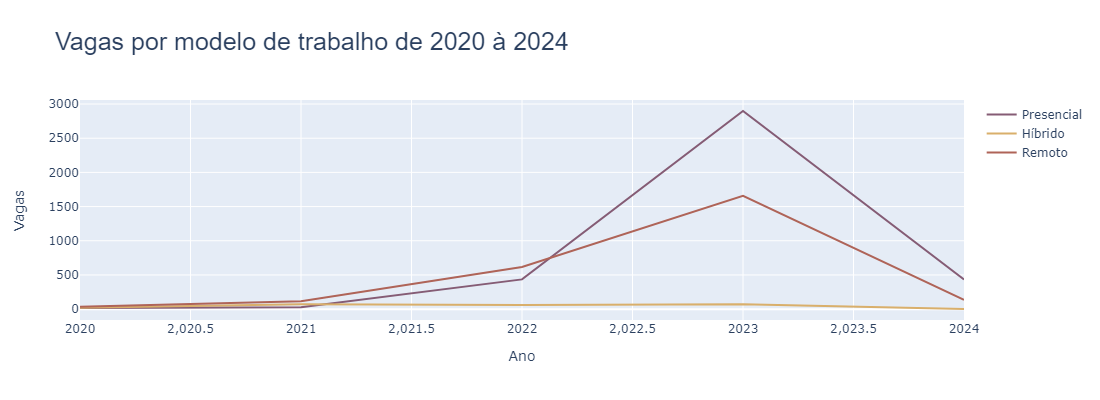

In [83]:
model = df.groupby(['work_year', 'work_models'])['employee_residence'].count().reset_index()

pres = model[model['work_models'] == 'On-site']
hybrid = model[model['work_models'] == 'Hybrid']
remote = model[model['work_models'] == 'Remote']

line1 = go.Scatter( 
                    x = pres['work_year'], 
                    y = pres['employee_residence'],
                    mode = 'lines',
                    line = {'color': '#855c75'},
                    name = 'Presencial')
                
line2 = go.Scatter( 
                    x = hybrid['work_year'], 
                    y = hybrid['employee_residence'],
                    mode = 'lines',
                    line = {'color': '#d9af6b'},
                    name = 'Híbrido')    

line3 = go.Scatter( 
                    x = remote['work_year'], 
                    y = remote['employee_residence'],
                    mode = 'lines',
                    line = {'color': '#af6458'},
                    name = 'Remoto') 

layout = go.Layout(title = 'Vagas por modelo de trabalho de 2020 à 2024',
                   xaxis = {'title': 'Ano'},
                   yaxis = {'title': 'Vagas'},
                   title_font = {'family': 'Helvetica', 'size': 25},
                   width = 1100, 
                   height = 400)

fig = go.Figure(data = [line1, line2, line3],
                layout = layout)

fig.show(renderer = 'png')

2023 foi um ano com muitas vagas na área de Data Science no site de onde estamos retirando os dados, e com 2024 apenas no começo acho que o recorte de tempo mostra uma tendência do contínuo crescimento de vagas remotas e em dados em geral (vagas presenciais em 2024 já quase superam o total de 2022), apesar da prevalência de vagas presenciais.

### Como é a progressão dos salários de acordo com o nível de carreira?

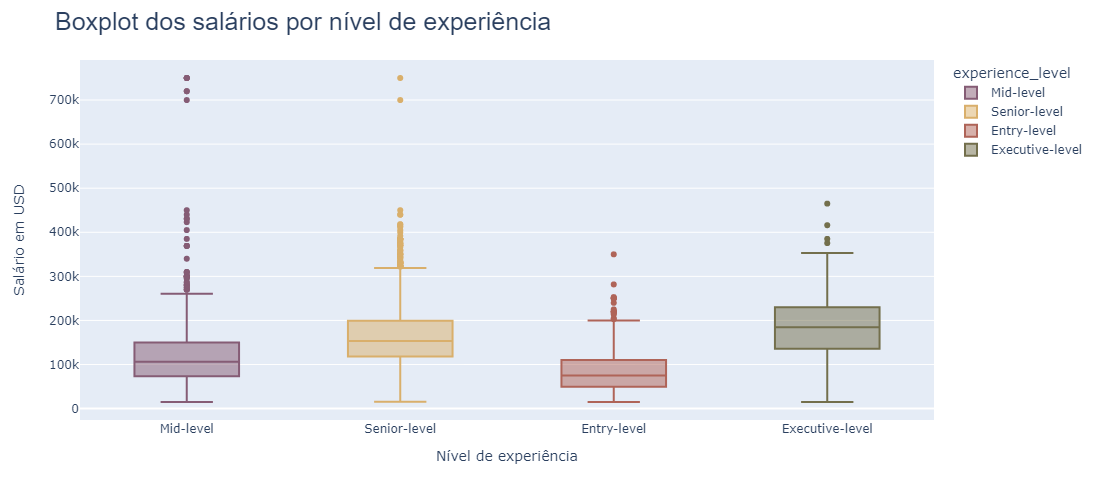

In [121]:
fig = px.box(df, 
             x = 'experience_level', 
             y = 'salary_in_usd', 
             color = 'experience_level', 
             color_discrete_sequence = px.colors.qualitative.Antique)

fig.update_layout(title = 'Boxplot dos salários por nível de experiência', 
                  title_font = {'family': 'Helvetica', 'size': 25},
                  xaxis_title = 'Nível de experiência',
                  yaxis_title = 'Salário em USD', 
                  width = 1100, 
                  height = 500)

fig.show(renderer = 'png')

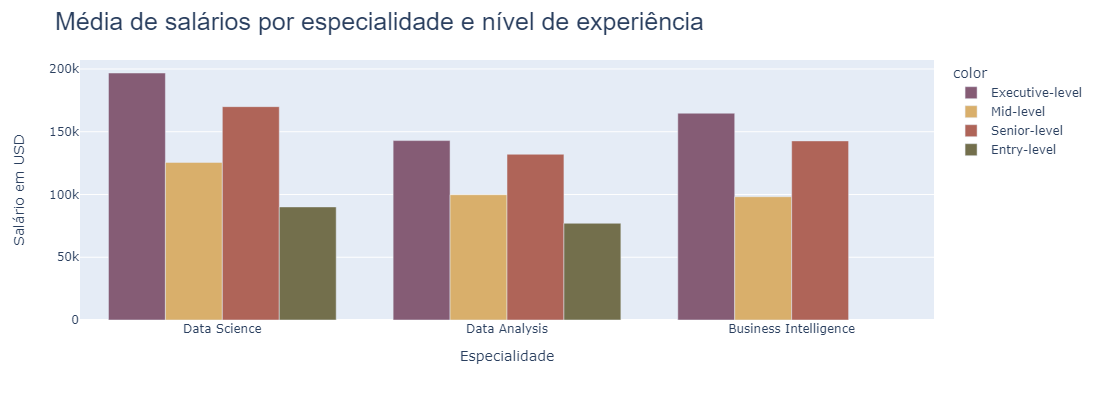

In [137]:
esp_jobs = df.groupby(['expertise', 'experience_level'])['salary_in_usd'].mean().reset_index()
esp_jobs.columns = ['Especialidade', 'Nível de Experiência', 'Salário em USD']

fig = px.bar(esp_jobs, 
             x = esp_jobs['Especialidade'][:23], 
             y = esp_jobs['Salário em USD'][:23], 
             color = esp_jobs['Nível de Experiência'][:23], 
             color_discrete_sequence = px.colors.qualitative.Antique, 
             barmode = 'group')
             

fig.update_layout(title = 'Média de salários por especialidade e nível de experiência', 
                  title_font = {'family': 'Helvetica', 'size': 25},
                  xaxis_title = 'Especialidade',
                  yaxis_title = 'Salário em USD', 
                  width = 1100, 
                  height = 400)

fig.update_xaxes(categoryorder='total descending')

fig.show(renderer = 'png')

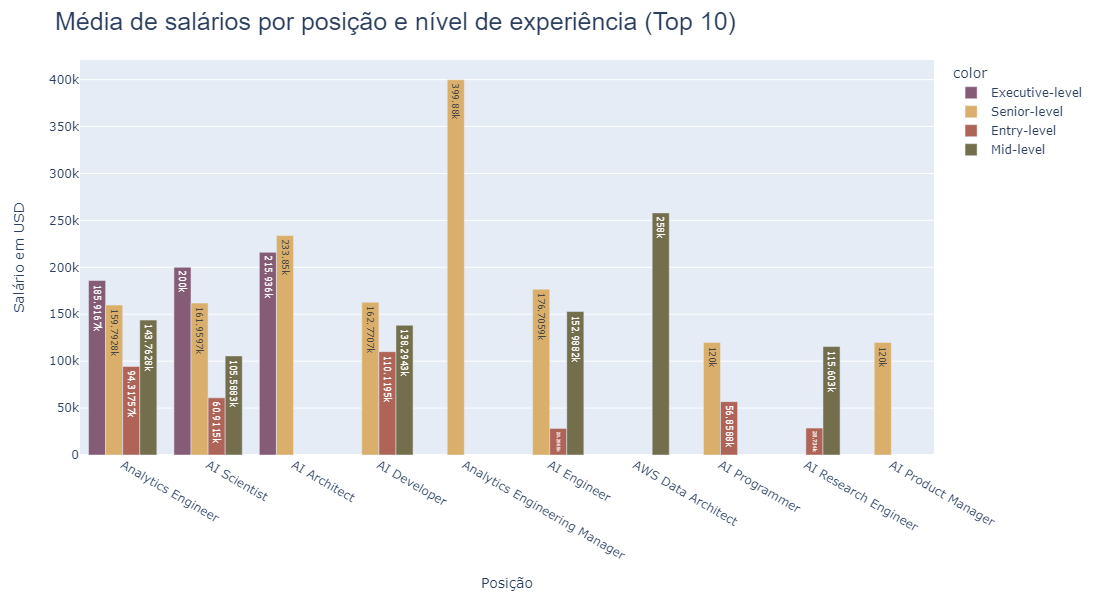

In [128]:
exp_jobs = df.groupby(['job_title', 'experience_level'])['salary_in_usd'].mean().reset_index()
exp_jobs.columns = ['Posição', 'Nível de Experiência', 'Salário em USD']

fig = px.bar(exp_jobs, 
             x = exp_jobs['Posição'][:23], 
             y = exp_jobs['Salário em USD'][:23], 
             color = exp_jobs['Nível de Experiência'][:23], 
             color_discrete_sequence = px.colors.qualitative.Antique, 
             barmode = 'group',
             text_auto = True)

fig.update_layout(title = 'Média de salários por posição e nível de experiência (Top 10)', 
                  title_font = {'family': 'Helvetica', 'size': 25},
                  xaxis_title = 'Posição',
                  yaxis_title = 'Salário em USD', 
                  width = 1100, 
                  height = 600)

fig.update_xaxes(categoryorder='total descending')

fig.show(renderer = 'png')

As posições relacionadas a AI (Inteligência Artifical) são as mais bem remuneradas dentro do mercado. Mesmo profissionais de entry-level tem oportunidades com alta remuneração. Mas ainda sim, maioria das ofertas estão entre mid e senior-level. Executivos costumam ser o mais bem remunerados dentro das empresas, mas no último gráfico vimos uma pequena excessão quando se trata de arquiteto de AI. 

### Como o tamanho da empresa afeta o salário?

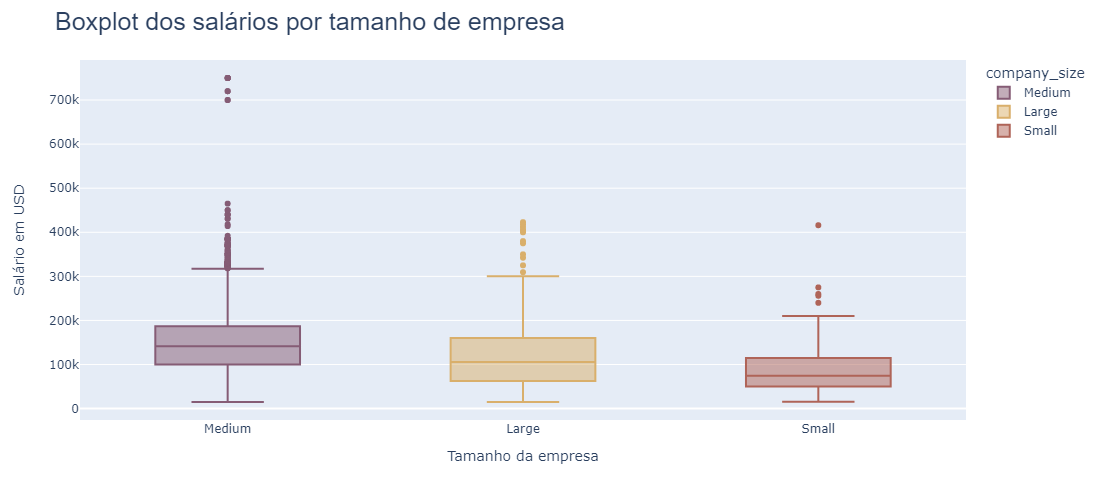

In [141]:
fig = px.box(df, 
             x = 'company_size', 
             y = 'salary_in_usd', 
             color = 'company_size', 
             color_discrete_sequence = px.colors.qualitative.Antique)

fig.update_layout(title = 'Boxplot dos salários por tamanho de empresa', 
                  title_font = {'family': 'Helvetica', 'size': 25},
                  xaxis_title = 'Tamanho da empresa',
                  yaxis_title = 'Salário em USD', 
                  width = 1100, 
                  height = 500)

fig.show(renderer = 'png')

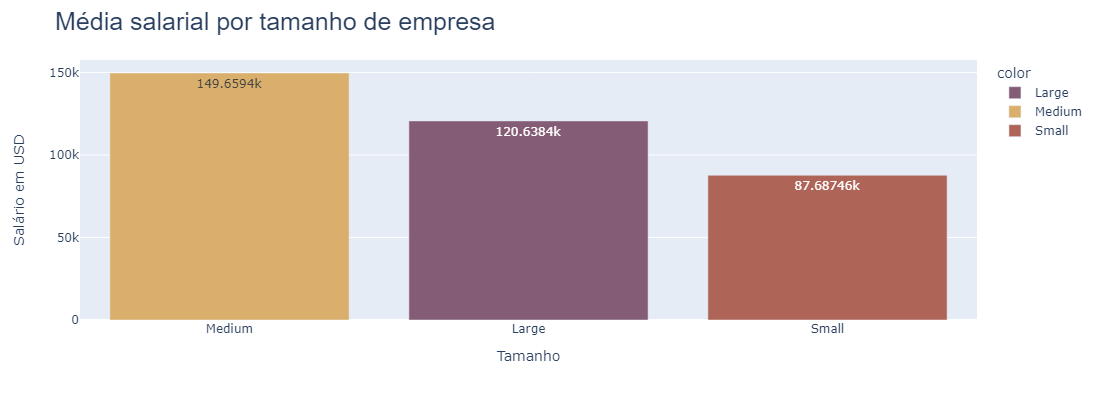

In [152]:
size = df.groupby('company_size')['salary_in_usd'].mean().reset_index()
size.columns = ['Tamanho da Companhia', 'Média Salarial em USD']

fig = px.bar( 
             x = size['Tamanho da Companhia'], 
             y = size['Média Salarial em USD'], 
             color = size['Tamanho da Companhia'], 
             color_discrete_sequence = px.colors.qualitative.Antique, 
             text_auto = True)

fig.update_layout(title = 'Média salarial por tamanho de empresa', 
                  title_font = {'family': 'Helvetica', 'size': 25},
                  xaxis_title = 'Tamanho',
                  yaxis_title = 'Salário em USD', 
                  width = 1100, 
                  height = 400)

fig.update_xaxes(categoryorder = 'total descending')

fig.show(renderer = 'png')

Empresas médias além de contratar, também são as que tem maior média salarial para profissionais de dados.

# 5. Conclusões

![Imagem1](https://images.unsplash.com/photo-1486312338219-ce68d2c6f44d?q=80&w=2072&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D)

Planejar e tomar decisões sempre medindo todos os passos para o processo ter o rendimento mais eficaz e eficiente foi a base da minha formação academica, como Engenheiro de Produção, buscar formas, maneiras e ferramentas para melhorar os processos sempre me interessaram. Ao progredir para supervisor de vendas durante minha carreira como corretor de imóveis, analisar o desempenho dos colegas e dos produtos na incorporadora estimularam ainda mais minha mente a um pensamento guiado por dados. Em 2022 quando tive a oportunidade de poder retomar e concluir minha graduação após a pandemia de COVID-19, a área de dados parecia como uma escolha cristalina do meu próximo passo de transição para uma nova carreira. Saber onde estou pisando ainda sim é importante, e ver que a progressão de carreira tem amplas opções de caminhos para seguir é muito animador.

### Alguns insights

- O site que serviu de base para os dados é norte-americano que também é onde estão sediadas maioria das grandes empresas de tecnologia, então naturalmente maioria das vagas vão estar localizadas neste país mas existe uma grande diversidade de localizações para trabalhar de forma remota, como diversos países europeus o que é interessante. A Índia é outro páis que emprega muitos profissionais e tem uma tradição de formar excelentes programadores.
- O trabalho remoto ainda tem uma quantidade significante de vagas ofertadas, e com tantas empresas sediadas nos Estados Unidos e Europa ter fluência em inglês é um grande diferencial para carreira.
- Apesar da pandemia e dos layoffs os salários continuam crescendo, muito por conta das posições que tratam de AI, existe uma tendência de queda próxima a uma estabilização dos salários dos analistas, a partir da observação deste conjunto de dados.
- A grande diferença entre as ofertas de vagas Senior, Mid e Entry-level indica a necessidade de entrada de mais profissionais no mercado ao longo do tempo e do avanço de carreira dos profissionais alocados.
- Empresas de porte médio são onde se encontram maioria das vagas e melhores salários, isso é uma surpresa para mim. Mas um sinal de onde devo procurar aplicar por vagas.
- Vagas de engenharia e arquitetura de dados remuneram bem e são áreas que devo buscar entender um pouco melhor, e são boas opções para me especializar no futuro.